In [1]:
#Instal os pacotes necessários
#!pip install PyMuPDF
#!pip install networkx[default]
#!pip install --upgrade networkx[default]
#!pip install scipy
#!pip install PyPDF2
#!pip install beautifulsoup4
#!pip install matplotlib && wordcloud && requests
#!pip install --user -U nltk
#!pip install --user -U numpy

In [2]:
#Importa os pacotes necessários à aplicação
import networkx as nx
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import PyPDF2

In [5]:
# Lista de caminhos de arquivos PDF
caminhos = [
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-0034425782900438-main.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S1470160X14000338-main.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S0048969724001268-main.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2210670724000660-main.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2212041617306903-main.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2212041618302171-main.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2405844023005297-main.pdf',
    #r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\Ecosystem and Human Well-Being.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\First_Results_From_the_Phenology-Based_Synthesis_Classifier_Using_Landsat_8_Imagery.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\s10668-015-9653-y.pdf',
    r'D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\s12145-019-00391-2.pdf',
    r'C:\Users\Well\Downloads\Data Science Projetos interessantes\Ref_Artigo\wcr_2022.pdf'
]

# Itera sobre os caminhos e abre cada arquivo PDF
for caminho in caminhos:
    with open(caminho, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        print("Conteúdo do arquivo", caminho)
        for page in range(len(reader.pages)):
            text = reader.pages[page].extract_text()
            print(text)
            print("----Fim da página----")


Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-0034425782900438-main.pdf
REMOTE SENSING OF ENVIRONMENT 12:313-329 (1982) 313 
Survey of Emissivity Variability in Thennography of Urban Areas 
DAVID A. ARTIS and WALTER H. CARNAHAN 
Physics Department, Indiana State University, Terre Haute, Indiana 47809 
This study investigates the effects of roof emissivity variation of aerial thermogram images. Thermograms have been 
used to detect heat loss from residential roofs. Emissivity variation among rooftops, however, can lead to a 
misrepresentation of the temperatures mapped in a thermogram image. The objectives of this study were (a) to 
demonstrate the feasibility of a technique to use remotely sensed data to calculate surface emissivities and (b) to apply 
that technique, to determine the extent of emissivity variation in urban surfaces. In the first part of the experimental 
approach a passive technique is developed to calculate emissivity from two-b

In [6]:
# Iterando sobre os caminhos e abrindo cada arquivo PDF
pdf_texts = []
for caminho in caminhos:
    with open(caminho, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        print("Conteúdo do arquivo", caminho)
        text = ""
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
            text += "\n----Fim da página----\n"
        pdf_texts.append(text)

# Concatenando todos os textos em uma única string
all_text = ' '.join(pdf_texts)

# Agora você pode usar a variável all_text conforme necessário
print(all_text)

Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-0034425782900438-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S1470160X14000338-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S0048969724001268-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2210670724000660-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2212041617306903-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2212041618302171-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\1-s2.0-S2405844023005297-main.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projetos_interessantes\Ref_Artigo\First_Results_From_the_Phenology-Based_Synthesis_Classifier_Using_Landsat_8_Imagery.pdf
Conteúdo do arquivo D:\Artigos\Data_Science_Projeto

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Well\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
# Criar uma nuvem de palavras com as palavras mais frequentes
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('portuguese', 'english'))
stopwords.update(['A','B','C','D','E','F','G','H','I','J','L','M','N','O','P','Q','R','S','T','U','V','X',
                  'Z','K','Y','at','et','it','daytime','this','that','We','that','up','use','were','with','by',
                  'between','over','on','al', 'doi', 'urbe','used', 'Revista', 'Referências', 'Brasileira', 'Belém',
                  'from','in', 'the', 'and', 'of', 'are', 'to', 'i', 'is', 'J','http','https','which', 'such', 'last',
                  'acessed','also','these','can','has','been','was','et','al','al.','an','as','at','be','by','do','for',
                  'in','is','it','of','on','or','to','we', 'per', 'cent','data','Fim', 
                  'The impact of land cover on surface temperature regulating service provided by Green Infrastructures: a case study in Campinas, Brazil',
                  'not','our','so','this','up','use','were','with','by','between','over','on','al', 'doi', 'urbe','used',
                  'while','there','their','other','UN','new','will','Figure','acwess','have','more','its', 'they','than','example','city','pandemic',   'covid','COVID',
                  'Chapter','future','futures','access','but','area','study','region','areas','need','org','all','www'])
wordcloud = WordCloud(stopwords=stopwords).generate(all_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Well\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 

 
Nuvem de palavras criadas com WordCloud a partir dos artigos científicos: 


 



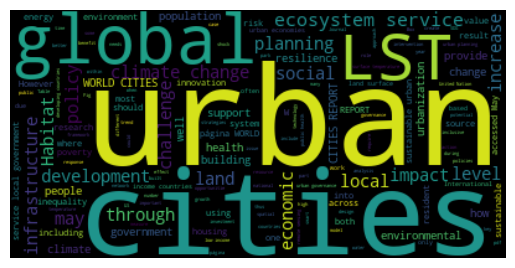

In [59]:
# criar a nuvem de palavras com as palavras mais frequentes
wordcloud = WordCloud(stopwords=stopwords).generate(all_text)
# plotar a nuvem de palavras
print(' \n\n ')
print('Nuvem de palavras criadas com WordCloud a partir dos artigos científicos:', '\n\n')
print(' \n')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 

 
Nuvem de palavras criadas com WordCloud a partir dos artigos científicos: 


 



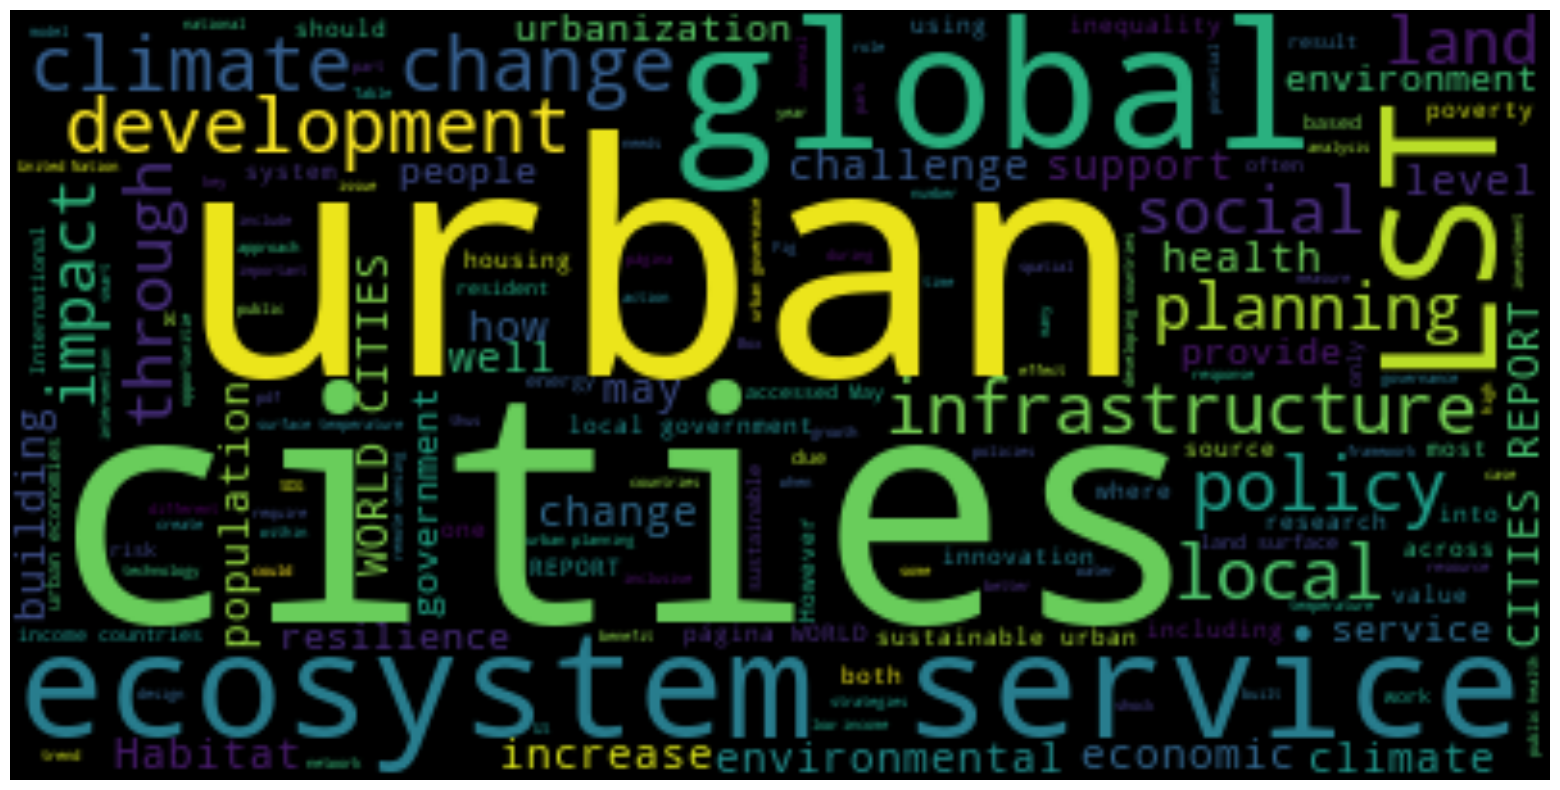

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# criar a nuvem de palavras com as palavras mais frequentes
wordcloud = WordCloud(stopwords=stopwords).generate(all_text)

# ajustar o tamanho da figura
plt.figure(figsize=(20, 10))  # largura, altura

# plotar a nuvem de palavras
print(' \n\n ')
print('Nuvem de palavras criadas com WordCloud a partir dos artigos científicos:', '\n\n')
print(' \n')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# salvar a imagem plotada
plt.savefig('wordcloud_plot.png', bbox_inches='tight')

# mostrar a plotagem
plt.show()


In [62]:
# Obtem as palavras mais frequentes
freq_words = wordcloud.words_

# Cria um dicionário com a frequência das palavras em cada documento

word_freqs = {}
for i, text in enumerate(pdf_texts):
  words = nltk.word_tokenize(text)
  words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
  freq_dist = nltk.FreqDist(words)
  word_freqs[i] = {word: freq_dist[word] for word in freq_words if word in freq_dist}


 

 
O NetworkX criou grafos baseados nas relações de similaridade dentre as palavras dos artigos científicos:  




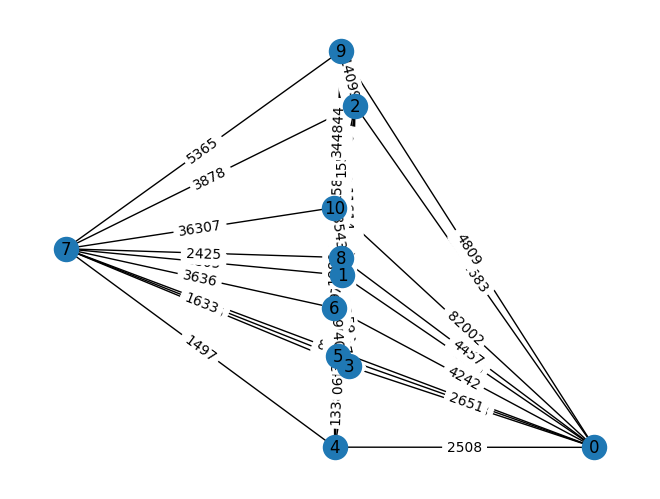

In [63]:
# Cria um grafo com as relações de similares

G = nx.Graph()
for i in range(len(pdf_texts)):
    for j in range(i+1, len(pdf_texts)):
        similarity = sum([word_freqs[i][words] * word_freqs[j][words] for words in freq_words if words in word_freqs[i] and words in word_freqs[j]])
        G.add_edge(i, j, weight=similarity)
# Plota o grafo
print(' \n\n ')
print('O NetworkX criou grafos baseados nas relações de similaridade dentre as palavras dos artigos científicos: ', '\n\n')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [65]:
import pandas as pd

# Supondo que você tenha uma lista chamada pdf_texts contendo os textos dos documentos

# Supondo também que você tenha uma lista chamada stopwords contendo as palavras a serem removidas

# Cria um dicionário com a frequência das palavras em cada documento
word_freqs = {}
for i, text in enumerate(pdf_texts):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    freq_dist = nltk.FreqDist(words)
    word_freqs[f'Document {i+1}'] = freq_dist

# Cria um DataFrame a partir do dicionário
df = pd.DataFrame(word_freqs)

# Substitui todos os valores NaN por 0
df = df.fillna(0)

print('Frequencia que as palavras se repetiram em cada:', '\n\n')
print(df.iloc[:, :100].head(100))
print(df)


Frequencia que as palavras se repetiram em cada: 


             Document 1  Document 2  Document 3  Document 4  Document 5  \
remote              2.0         1.0        88.0        13.0         0.0   
sensing             6.0         2.0        49.0        14.0         0.0   
environment         1.0        13.0        16.0        25.0        14.0   
survey              8.0         0.0         0.0         2.0         1.0   
emissivity        100.0         0.0        11.0         2.0         0.0   
...                 ...         ...         ...         ...         ...   
detection           2.0         0.0         2.0         0.0         0.0   
ings                1.0         0.0         0.0         0.0         0.0   
schmer              2.0         0.0         0.0         0.0         0.0   
hause               2.0         0.0         0.0         0.0         0.0   
texas               4.0         0.0         0.0         0.0         0.0   

             Document 6  Document 7  Document 8

In [66]:
# Salva o DataFrame como um arquivo CSV
df.to_csv('frequencia_palavras.csv', index=False)
print("DataFrame salvo como 'frequencia_palavras.csv'")

DataFrame salvo como 'frequencia_palavras.csv'
